In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

In [2]:
# Parameters from VG's code ####################################

# tau_a = 10; #number of days people remain asymptomatic
# tau_s = 15; #number of days people remain symptomatic (since we are not considering hospitatlisation, etc)
# tau_e = 5; #incubation time for viral load to increase

# beta_a = 0.2; #transmission rate from asymptomatic to susceptible
# beta_s = 0.4; #transmission rate from symptomatic to susceptible

# gamma_e = 1.0/tau_e; #rate at which exposed become infected
# gamma_a = 1.0/tau_a; #rate at which asymptomatic recover
# gamma_s = 1.0/tau_s; #rate at which symptomatic recover

# p = 0.5; #fraction whom become asymptomatic



Let's start off with the following parameters:

\begin{equation}
\begin{aligned}
\dot{S}   &= - \beta \frac{S}{N} \left( C_A I_A + C_S I_S \right)\\
\dot{E}   &=  \beta \frac{S}{N} \left( C_A I_A + C_S I_S \right) + \gamma_E E \\
\dot{I}_S &=  (1-p) \gamma_E E - \gamma_S I_S\\
\dot{I}_A &=  p \gamma_E E - \gamma_A I_A\\
\dot{R}   &=  \gamma_S I_S + \gamma_A I_A
\end{aligned}
\end{equation}

In [3]:
# Parameters ###############################

beta = 1

C_A  = 0.4
C_S  = 0.8

gamma_E = 1/5
gamma_A = 1/3
gamma_S = 1/15

p = 0.5

T_max = 21; #number of lockdown days

############################################

In [4]:
def num_soln(E0,N):
    # Input parameters ####################
    #N = 1000                    # int; Total population.
    
    IA0, IS0, R0 = 0, 0, 0       # float; float; float; Initial number of infected (A and S), and recovered individuals
    
    S0 = N - IA0 - IS0 - R0 - E0        # float; Everyone else, S0, is susceptible to infection initially.
    
    t = np.linspace(0, T_max, 10*T_max)# A grid of time points (in days)
    
    #########################################
    
    

    # The SIR differential equations ########
    
    def deriv(y, t):
        S, E, IS, IA, R = y
        dSdt = -beta * S * (C_A * IA + C_S * IS) / N
        dEdt = +beta * S * (C_A * IA + C_S * IS) / N - gamma_E * E
        dISdt = (1-p) * gamma_E * E - gamma_S * IS
        dIAdt = p * gamma_E * E - gamma_A * IA
        dRdt = gamma_S * IS + gamma_A * IA
        return dSdt, dEdt, dISdt, dIAdt, dRdt
    
    #########################################
    
    
    y0 = S0, E0, IS0, IA0, R0                               # Initial conditions vector
    
    ret = odeint(deriv, y0, t) # Integrate the SIR equations over the time grid, t.
    
    S, E, IS, IA, R = ret.T                                   # Return the transpose of the matrix

    return t,S/N,E/N,IS/N,IA/N,R/N

In [5]:
def Gil(E0,N):
    # Input parameters ####################

    # N: int; family size
    
    n_E = E0         # int; initial exposed population in a family
    n_IA = 0         # int; initial infected populations in a family
    n_IS = 0
    n_R = 0          # int; recovered population

    T = T_max      # float; maximum elapsed time
    _t = 0.0       # float; start time


    V = N          # float; spatial parameter

    

    #########################################


    n_S = N - n_IA - n_IS - n_E  # Computing susceptible population


    # Initialize results list ###############

    S  = []
    E  = []
    IA = []
    IS = []
    R  = []
    t  = []

    S.append(n_S)
    E.append(n_E)
    IA.append(n_IA)
    IS.append(n_IS)
    R.append(n_R)
    t.append(_t)

    #########################################


    # Loop to compute results at every time-step

    while _t < T:                                        
        if n_IS + n_IA + n_E == 0:   # <+++ CHECK THIS!       
            break                                     # Stop the loop if there are no infected individuals

        w1 = beta * n_S * (C_A * n_IA + C_S * n_IS) / V
        w2 = (1-p) * gamma_E * n_E
        w3 = p * gamma_E * n_E
        w4 = gamma_S * n_IS
        w5 = gamma_A * n_IA
        W = w1 + w2 + w3 + w4 + w5

        dt = -np.log(random.uniform(0.0, 1.0)) / W
        _t = _t + dt
        
        r = random.uniform(0.0, 1.0)
        
        if r < w1 / W:
            n_S = n_S - 1
            n_E = n_E + 1
        elif r < (w1+w2) / W:
            n_E = n_E - 1
            n_IS = n_IS + 1
        elif r < (w1+w2+w3) / W:
            n_E = n_E - 1
            n_IA = n_IA + 1    
        elif r < (w1+w2+w3+w4) / W:
            n_IS = n_IS - 1
            n_R = n_R + 1
        else:
            n_IA = n_IA - 1
            n_R = n_R + 1

        S.append(n_S)
        E.append(n_E)
        IS.append(n_IS)
        IA.append(n_IA)
        R.append(n_R)
        t.append(_t)

#     plt.plot(t,S)
#     plt.plot(t,I)
#     plt.plot(t,R)
    return t,np.array(S)/N,np.array(E)/N,np.array(IS)/N, np.array(IA)/N,np.array(R)/N

In [17]:
total_iter = 100

T_max = 50
t_av = np.linspace(0.00000001,T_max,T_max)
S_av = np.zeros(len(t_av),float)
E_av = np.zeros(len(t_av),float)
IS_av = np.zeros(len(t_av),float)
IA_av = np.zeros(len(t_av),float)
R_av = np.zeros(len(t_av),float)

N_tot = 10000
exp_0 = 100

len_t = []

for i in range(0,total_iter):
    t,S,E,IS,IA,R = Gil(exp_0,N_tot)
    len_t.append(len(t))
    k=0
    j_max = 0
    s_at_k = 0
    e_at_k = 0
    is_at_k = 0
    ia_at_k = 0
    r_at_k = 0
    while(k<len(t_av)):
        counter = 0
        s_at_k = 0
        e_at_k = 0
        is_at_k = 0
        ia_at_k = 0
        r_at_k = 0
        for j in range(j_max,len(t)):
            if(t[j]<t_av[k]):
                is_at_k = is_at_k+IS[j]
                ia_at_k = ia_at_k+IA[j]
                s_at_k = s_at_k + S[j]
                r_at_k = r_at_k + R[j]
                e_at_k = e_at_k + E[j]
                counter += 1
            else:
                j_max = j+1
                if(counter !=0):
                    IS_av[k] = IS_av[k]+is_at_k/counter
                    IA_av[k] = IA_av[k]+ia_at_k/counter
                    S_av[k] = S_av[k]+s_at_k/counter
                    E_av[k] = E_av[k]+e_at_k/counter
                    R_av[k] = R_av[k]+r_at_k/counter
                break
        k=k+1
    
    
t_ex, S_ex, E_ex, IS_ex, IA_ex, R_ex = num_soln(exp_0,N_tot)

### Plotting the solutions

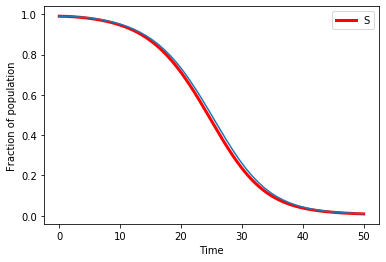

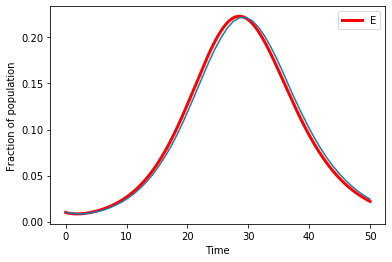

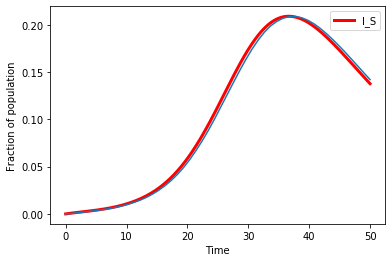

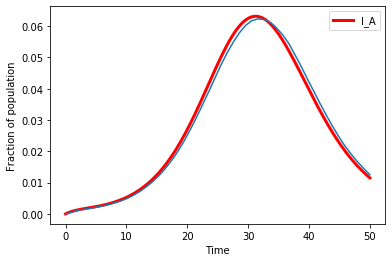

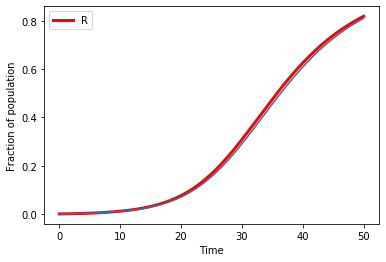

In [21]:
plt.plot(t_ex,S_ex, linewidth=3, color='red',label='S')
plt.plot(t_av,S_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.legend()
plt.show()

plt.plot(t_ex,E_ex, linewidth=3, color='red',label='E')
plt.plot(t_av,E_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.legend()
plt.show()

plt.plot(t_ex,IS_ex, linewidth=3, color='red',label='I_S')
plt.plot(t_av,IS_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.legend()
plt.show()

plt.plot(t_ex,IA_ex, linewidth=3, color='red',label='I_A')
plt.plot(t_av,IA_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.legend()
plt.show()

plt.plot(t_ex,R_ex, linewidth=3, color='red',label='R')
plt.plot(t_av,R_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.legend()
plt.show()